In [1]:
from preprocess import *

increase = get_exposure(0.5)
process('7_test.mp4', '7_test_bright.mp4', lambda x: lut(x, increase))

decrease = get_exposure(1.5)
process('7_test.mp4', '7_test_dark.mp4', lambda x: lut(x, decrease))

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# import skvideo
# path = "ffmpeg/bin"
# skvideo.setFFmpegPath(path)
# import skvideo.io

In [16]:
# transform greyscale image to RGB image
def imshow(img):
    return plt.imshow(np.stack([img for _ in '123'], axis=2))

def imshow_cl(img):
    return plt.imshow(img)

In [3]:
def get_exposure(gamma):
    gamma_table = np.power(np.arange(256)/255, gamma) * 255
    gamma_table = np.round(gamma_table).astype(np.uint8)
    return gamma_table

In [21]:
increase = get_exposure(0.5)

In [22]:
cap = cv2.VideoCapture('clip.mp4')
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
writer = cv2.VideoWriter('out.mp4', fourcc, 25, (640, 480))

while(cap.isOpened()):
    ret, frame = cap.read()
    
    if ret == True:
        frame = cv2.LUT(frame, increase)
        writer.write(frame)
    else:
        break
    
cap.release()
writer.release() 

## Multi-channel

In [5]:
# prepare gamma tables
identity = get_exposure(1.0)
increase = get_exposure(0.6)
decrease = get_exposure(1/0.6)

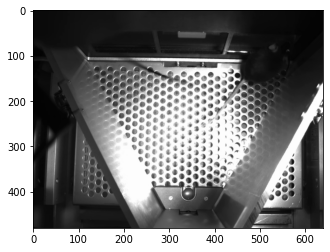

In [4]:
original = cv2.imread('img.png', cv2.IMREAD_GRAYSCALE)
imshow(original);

In [6]:
increased = cv2.LUT(original, increase)
decreased = cv2.LUT(original, decrease)

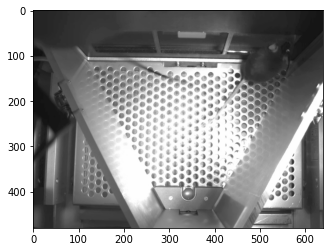

In [7]:
imshow(increased);

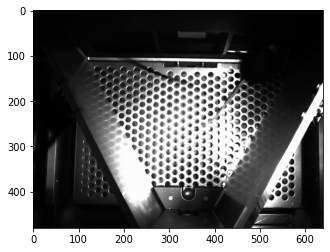

In [8]:
imshow(decreased);

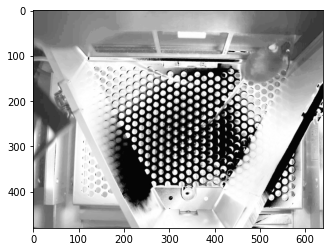

In [10]:
diff = increased - decreased
imshow(diff/np.max(diff))

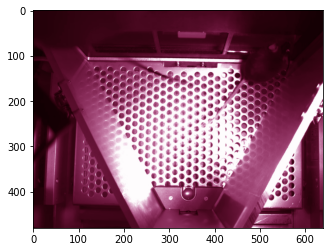

In [11]:
new = np.stack((increased, decreased, original), axis=2)
plt.imshow(new)

In [21]:
def process_video(in_file, func, out_writer, steps=-1):
    """
    Process video frame by frame
    
    Args
    --------------
    in_file : str
        input video file location
        
    func : function :: frame -> frame
        function to be applied to each frame
        
    out_write : cv.VideoWriter object
        output writer
    
    """
    i = steps  # hand brake
            
    videogen = skvideo.io.vreader('Example.mp4', as_grey=True)
    for frame in videogen:
        frame = func(frame.reshape(480, 640))
        writer.writeFrame(frame)
        i -= 1
        if i==0:
            break
    writer.close()

In [22]:
def bracket_exposure(gamma1, gamma2):
    """
    Apply exposure bracketing to a frame
    
    Args
    ------

    gamma1 : ndarray
        gamma table 1, in cv2.LUT form (1x256 dimension)
        
    gamma2 : ndarray
        gamma table 2
        
    Returns a curried function to process single frame
    """
    
    def bracket_inner(frame):
        """Process given frame with curried gamma tables"""
        frame1 = cv2.LUT(frame, gamma1)
        frame2 = cv2.LUT(frame, gamma2)
        return np.stack([frame1, frame2, frame], axis=2)
    
    return bracket_inner

In [24]:
writer = skvideo.io.FFmpegWriter("output.mp4")
func = bracket_exposure(increase, decrease)
process_video('Example.mp4', func, out, steps=10000)
out.release()

## Contrast

In [31]:
def get_contrast(a, b):
    """Apply linear transformation to adjust contrast"""
    return ((a * np.arange(256)/255 + b) * 255).astype(int)

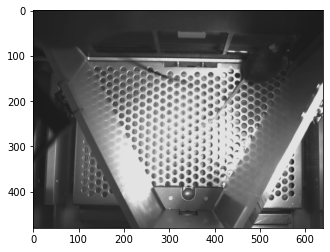

In [40]:
c = get_contrast(0.8, 0.1)
imshow(cv2.LUT(original, c))

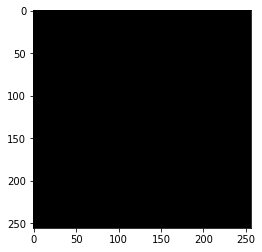

In [37]:
imshow(np.zeros((256,256)))